In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline

In [2]:
file=glob.glob("station_data\*.csv")
# file[1][13:19]
len(file)

18

In [3]:
df_sta=pd.read_csv('rel_station.csv',delimiter=";")
df_sta=df_sta[['Codigo Nacional','Codigo OACI','Latitud','Longitud']].set_index('Codigo Nacional')
# df_sta

# dP Chile


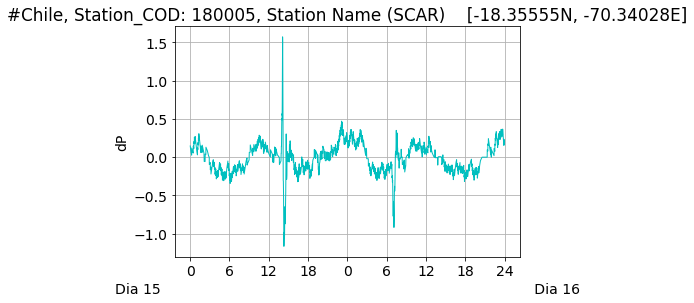

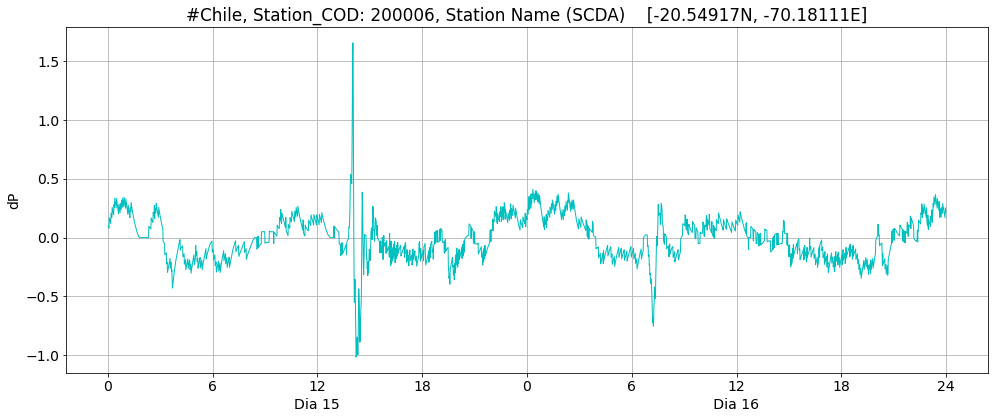

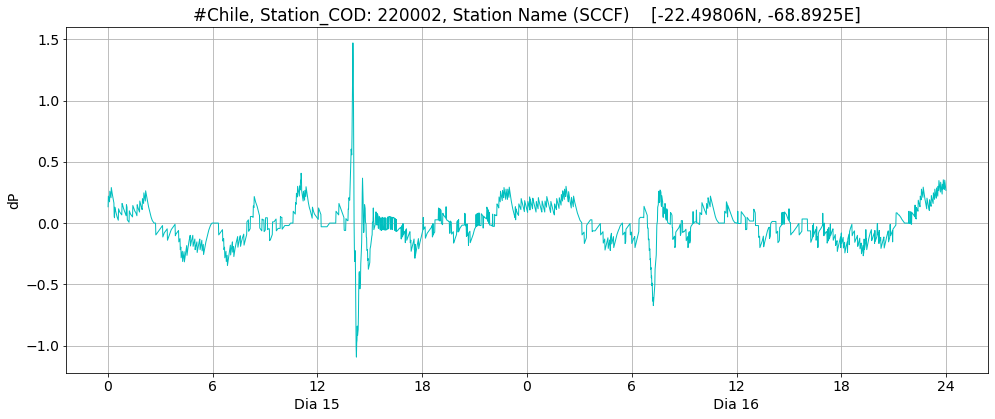

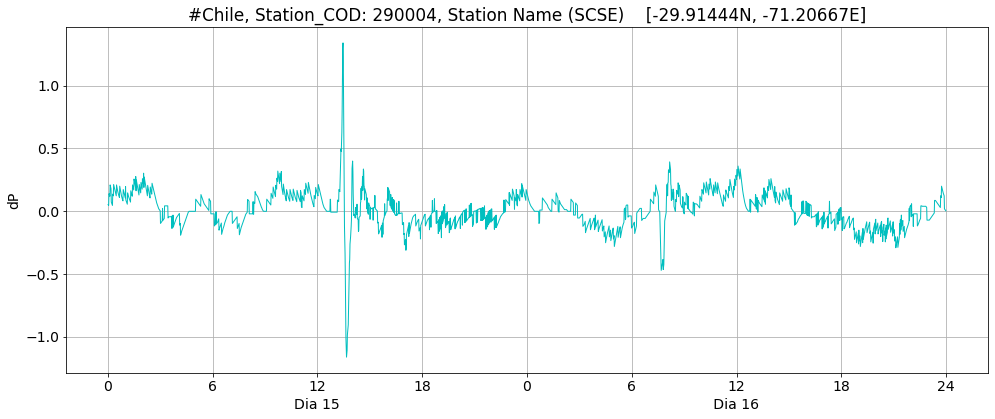

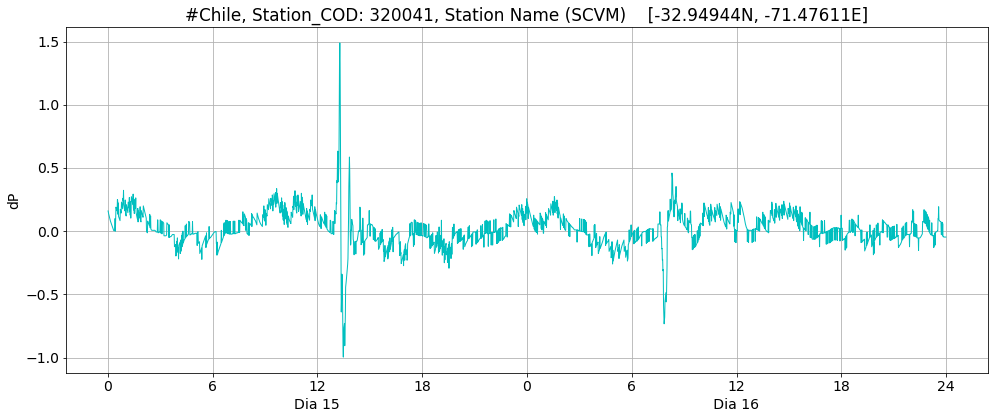

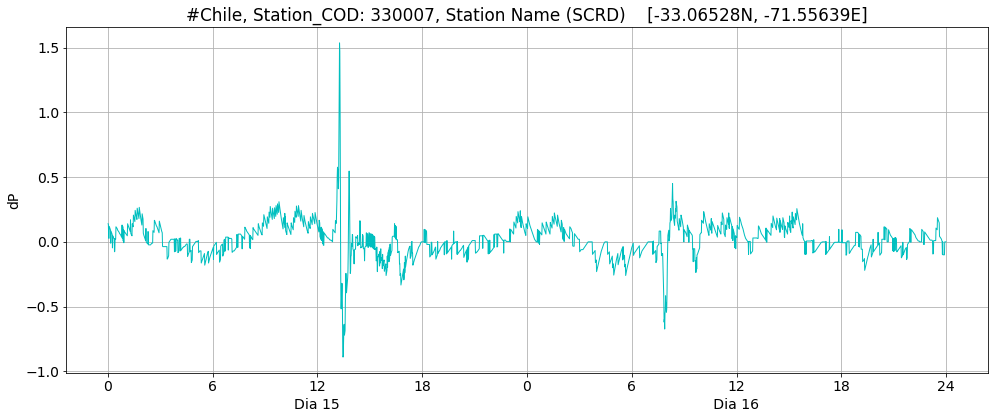

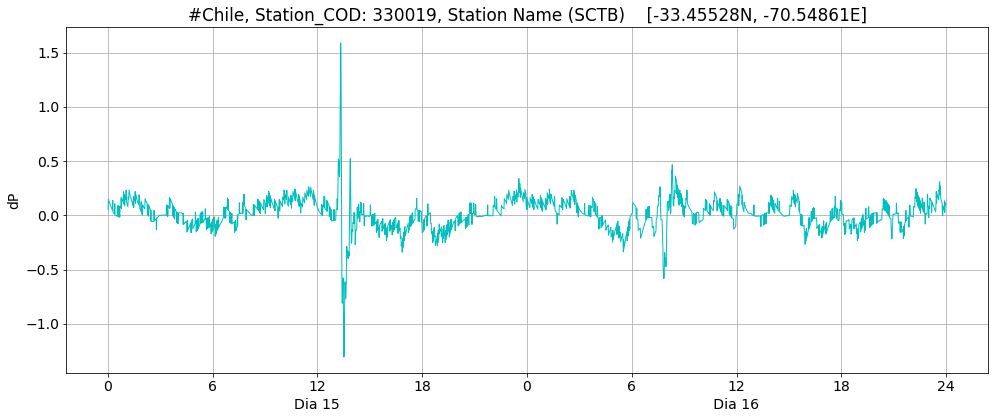

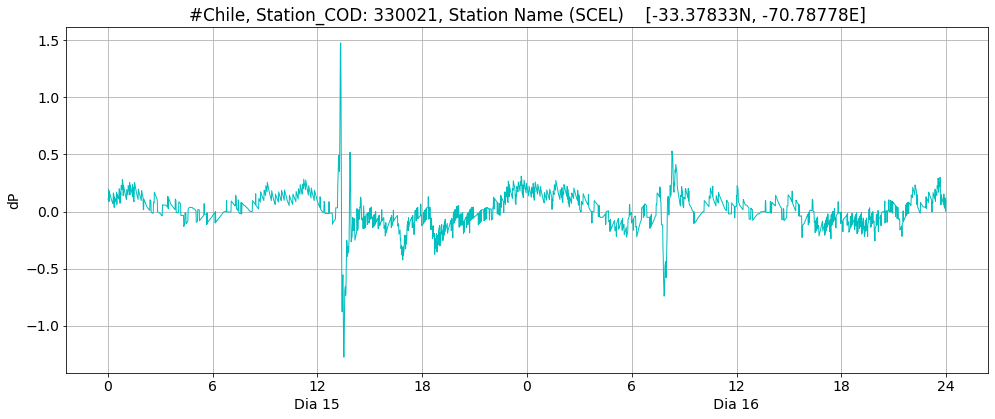

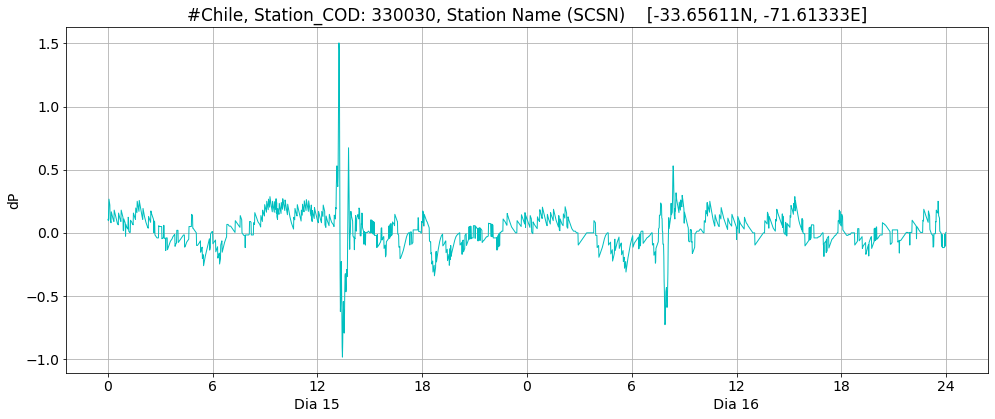

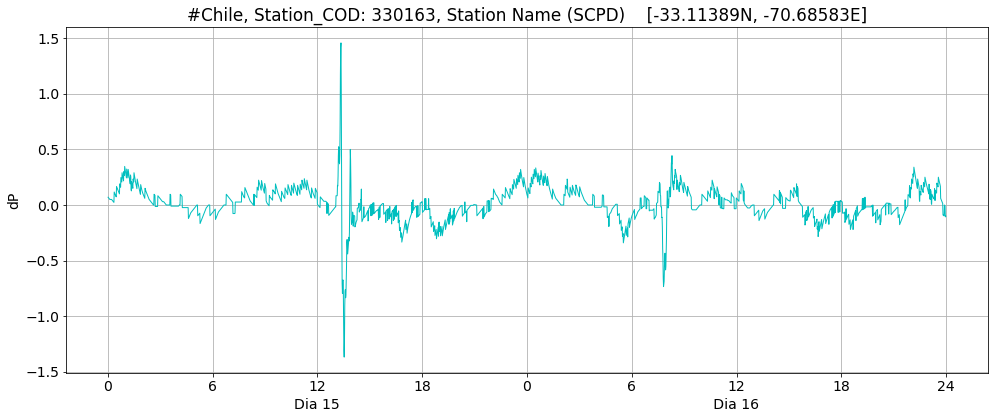

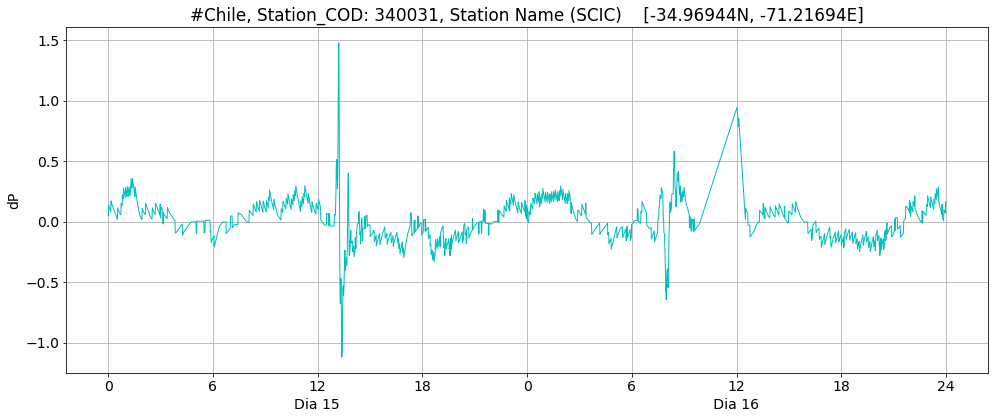

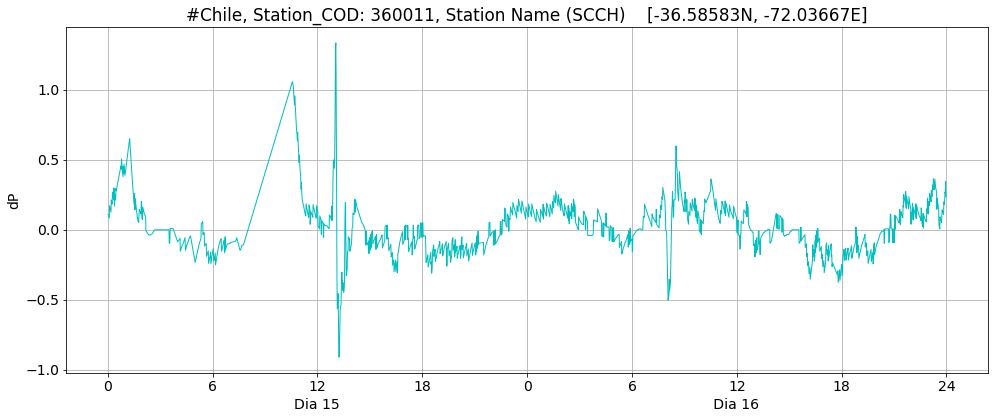

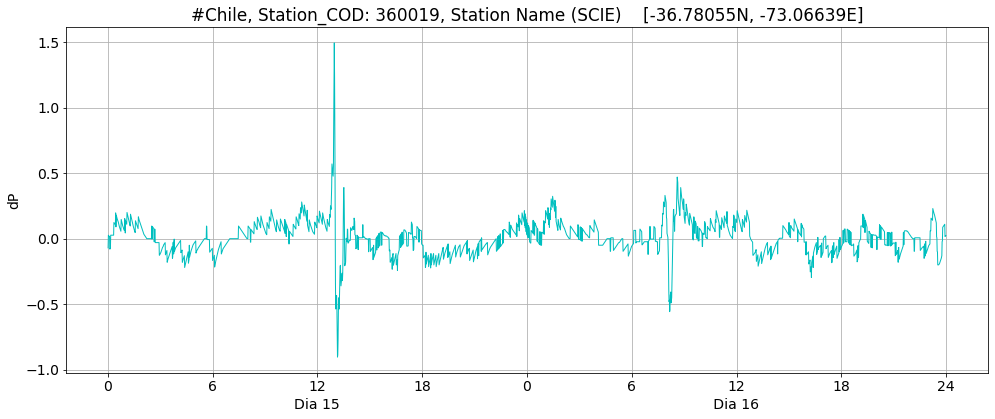

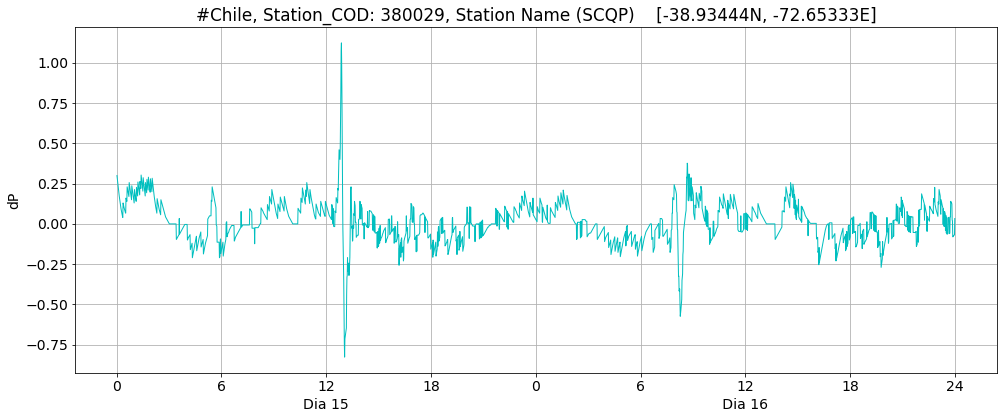

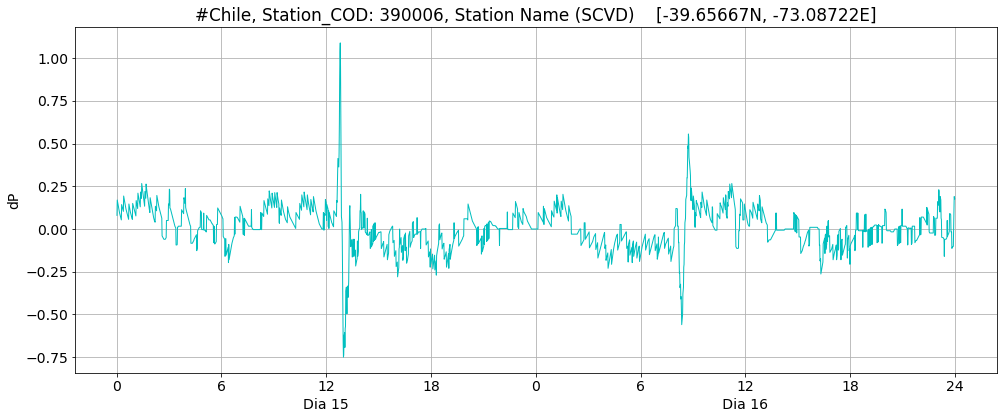

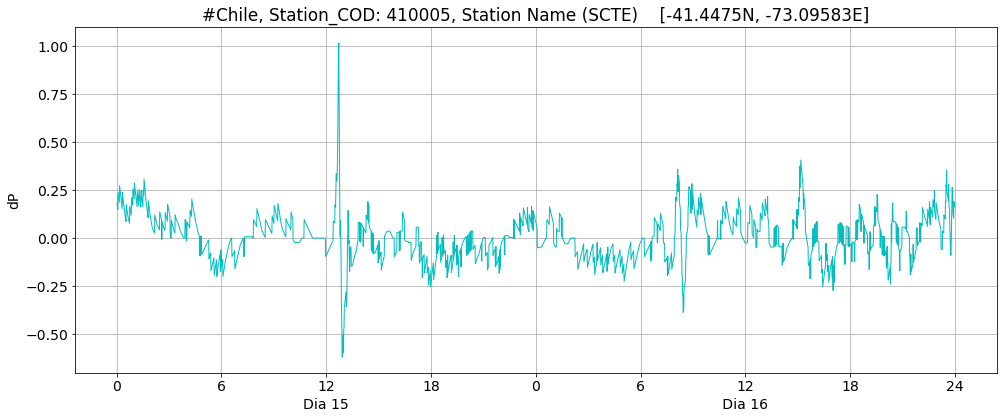

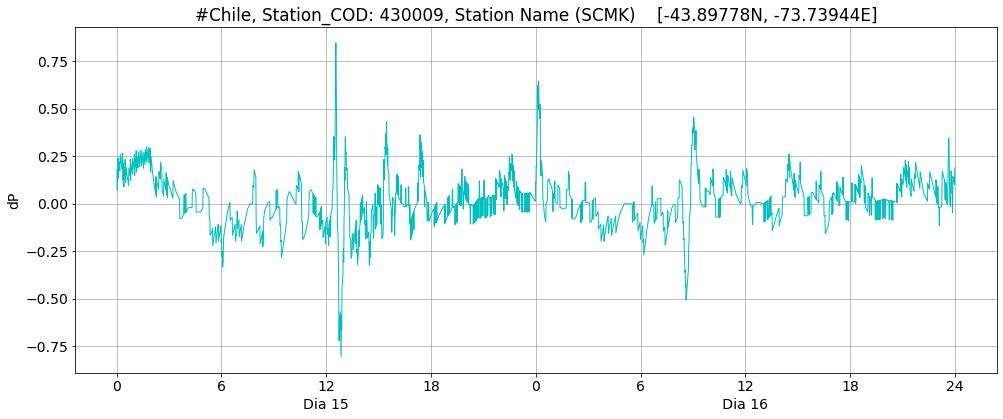

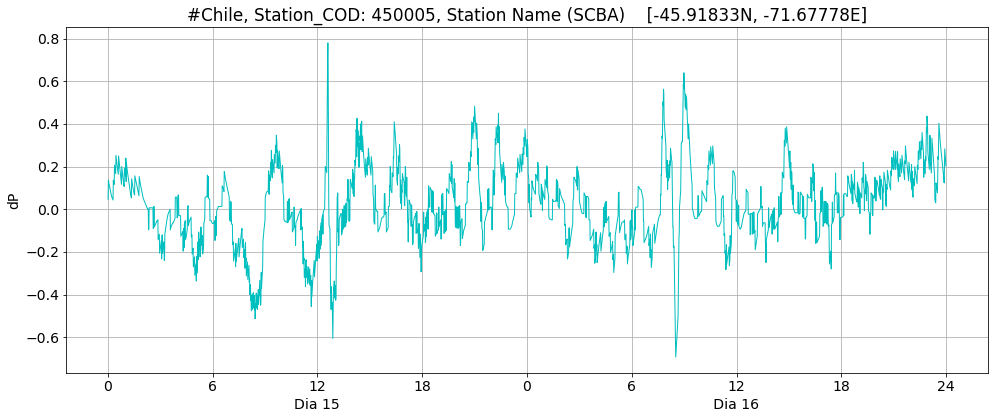

In [4]:
data_ini=15
data_max=17

for fn in range(len(file)):
    df_file=pd.read_csv(file[fn],delimiter=";")
    cod=int(file[fn][13:19])

    ###--Transformando as horas em decimal e armazenando tudo na coluna time
    df_file['dia']=df_file['momento'].str.slice(8, 10).astype(int)
    df_file['hora']=df_file['momento'].str.slice(11,13).astype(int)/24
    df_file['min']=df_file['momento'].str.slice(14,16).astype(int)/(60*24)
    df_file['seg']=df_file['momento'].str.slice(17,19).astype(int)/(60*60*24)
    df_file['time']=df_file['dia']+df_file['hora']+df_file['min']+df_file['seg']
    ###--Deletando as colunas que nao temos interesse 
    df_file=df_file[['time','p0']]
    ###--Deletando a ultima linha (1 de fevereiro)
    df_file = df_file.iloc[:-1 , :]

    ###--Tomando a dP de apenas uma estação.
    df_dP=pd.DataFrame() ###---------------------------------------------------------------Isso pode dar problema
    df_dP['time']=df_file['time']
    df_dP['p0']=df_file['p0']-df_file['p0'].rolling(30).mean()

    ###--Extraindo apenas as datas de interesse:
    ind=(df_dP['time']>data_ini) & (df_dP['time']<data_max) 

    ###----------------------------------------------###
    ###----------------------------------------------###
    fig=plt.figure()
    plt.rcParams['figure.figsize']=[16,6]
    plt.rcParams.update({'font.size':14})

    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    x=df_dP['time'][ind]
    y=df_dP['p0'][ind]

    ax.plot(x,y,'c',lw=1)

    sta_cod=cod
    sta_name=df_sta['Codigo OACI'][cod]
    sta_lat=df_sta['Latitud'][cod]
    sta_lon=df_sta['Longitud'][cod]

    ax.set_xlabel('Dia 15                                                                                   Dia 16')
    ax.set_ylabel('dP')
    plt.xticks([15,15.25,15.50,15.75,16,16.25,16.50,16.75,17],[0,6,12,18,0,6,12,18,24])
    ax.set_title('#Chile, Station_COD: {}, Station Name ({})    [{}N, {}E]'.format(sta_cod,sta_name,sta_lat,sta_lon))
    ax.grid(True)

    # ax.legend()
    fig.savefig('figures/{}_{}.pdf'.format(sta_cod,sta_name))

### Comentario

### Figura 1

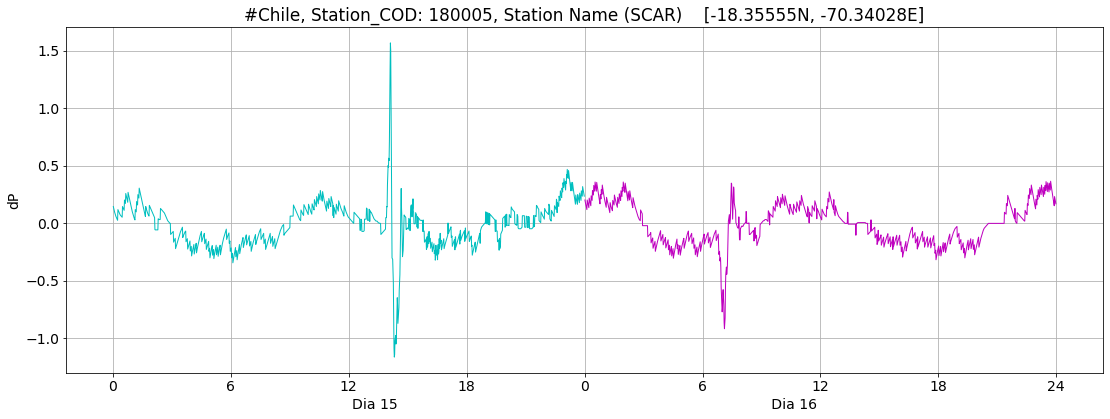

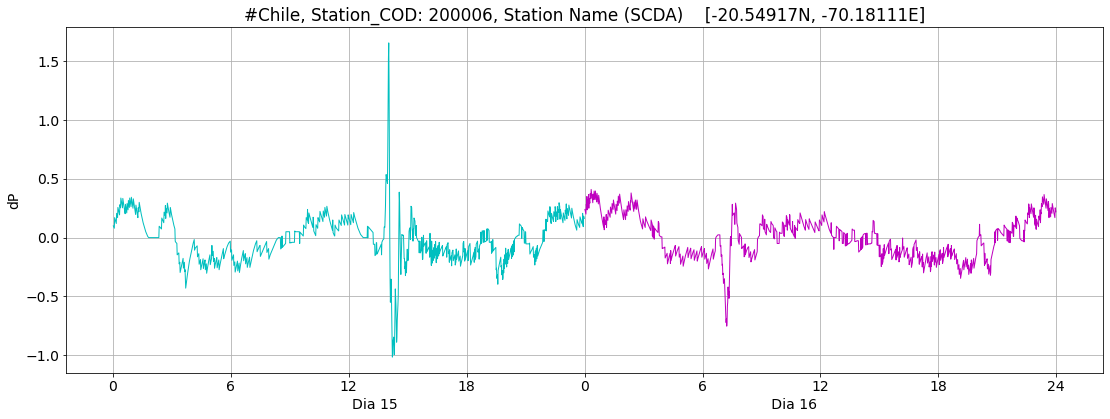

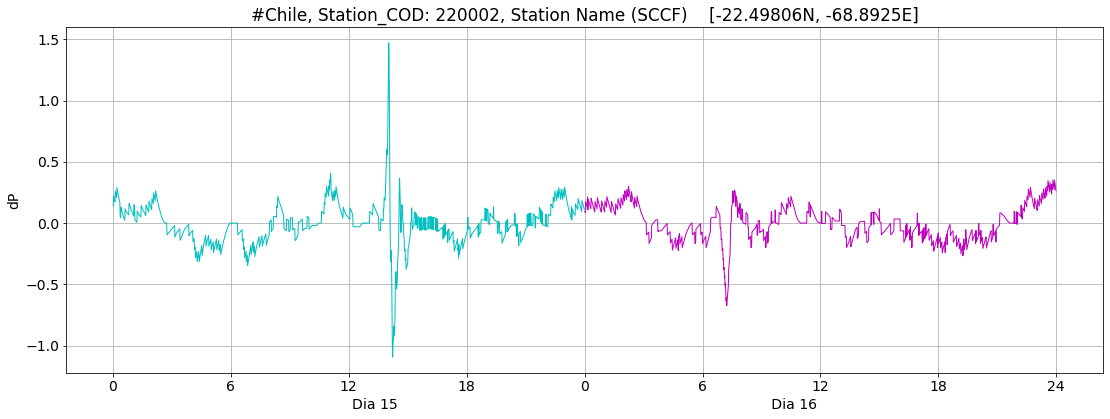

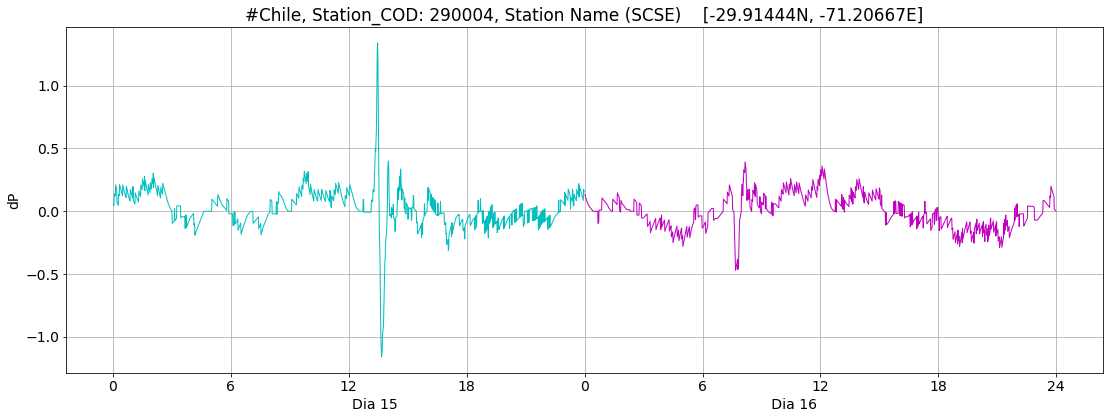

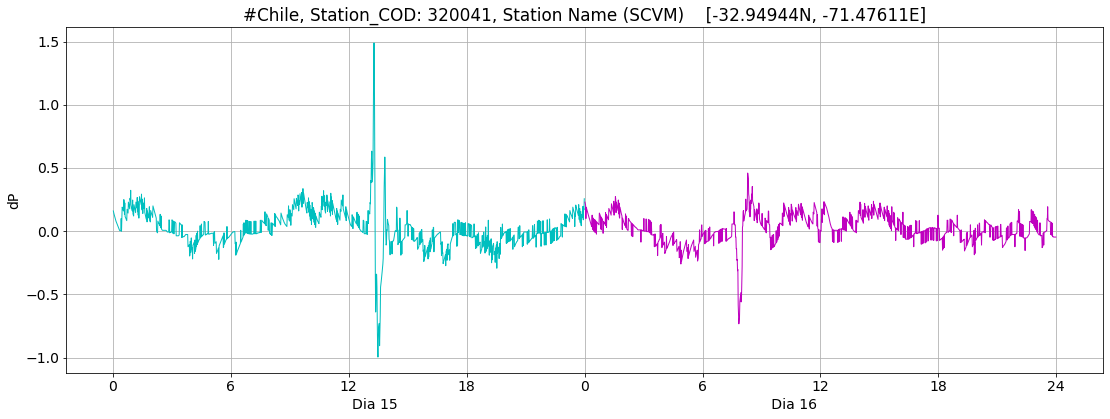

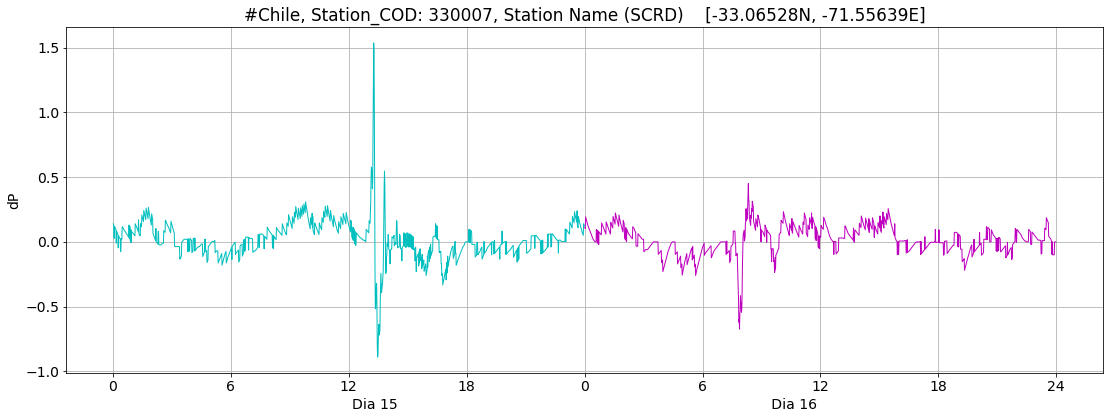

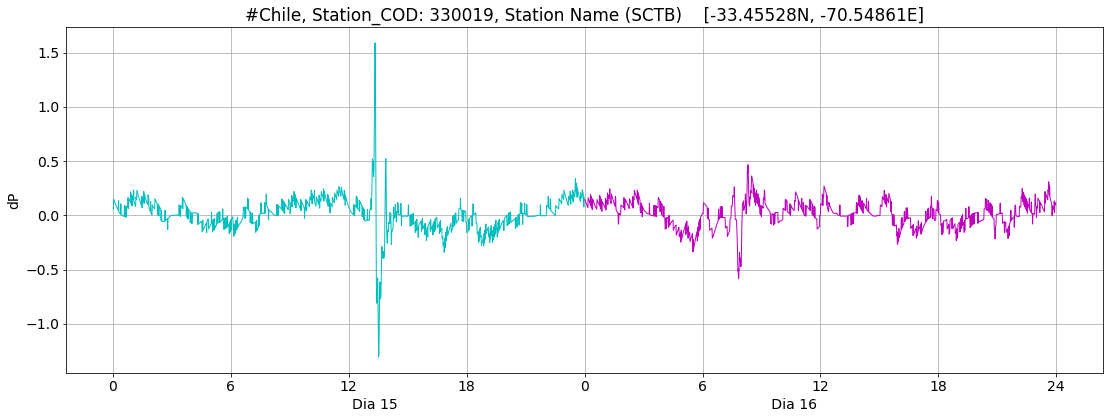

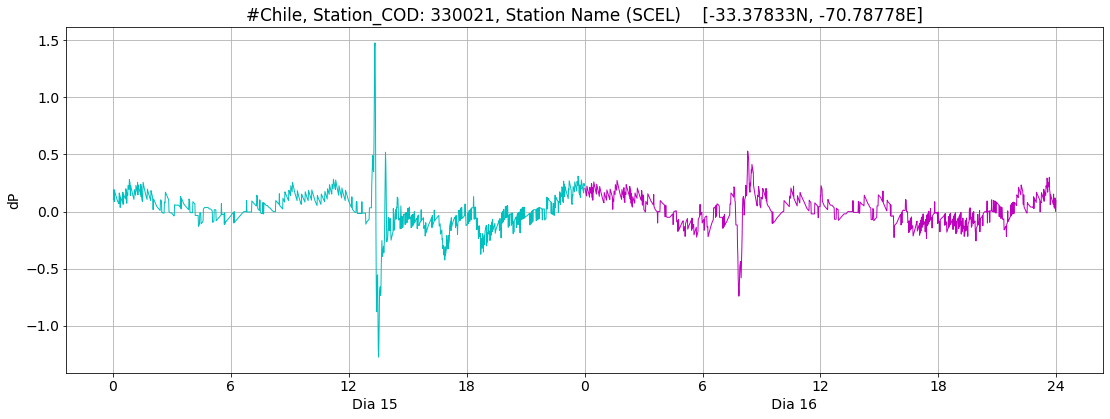

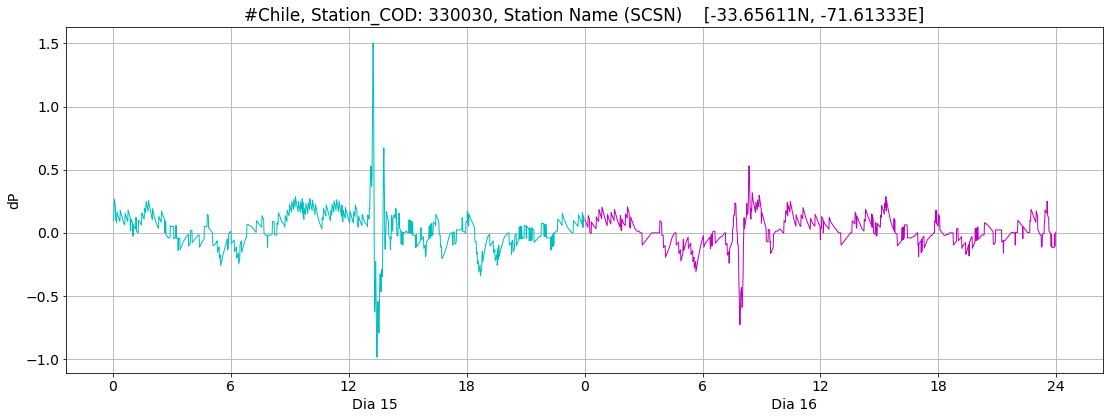

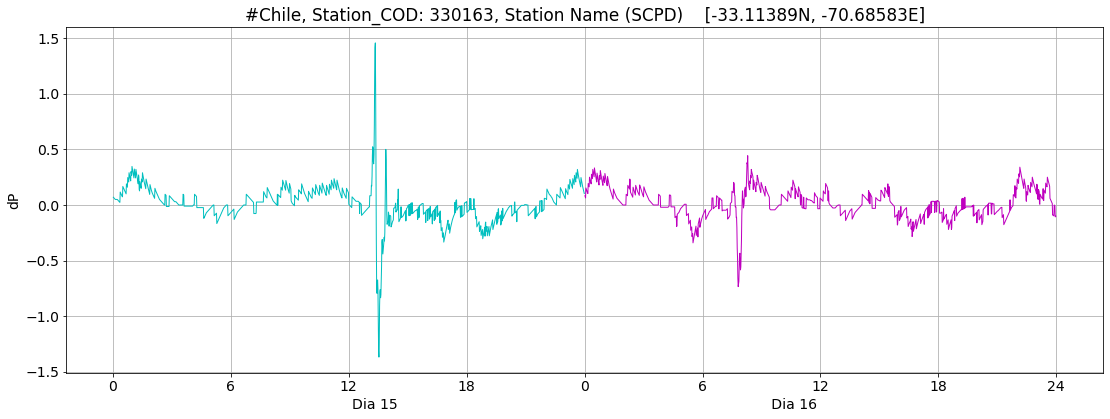

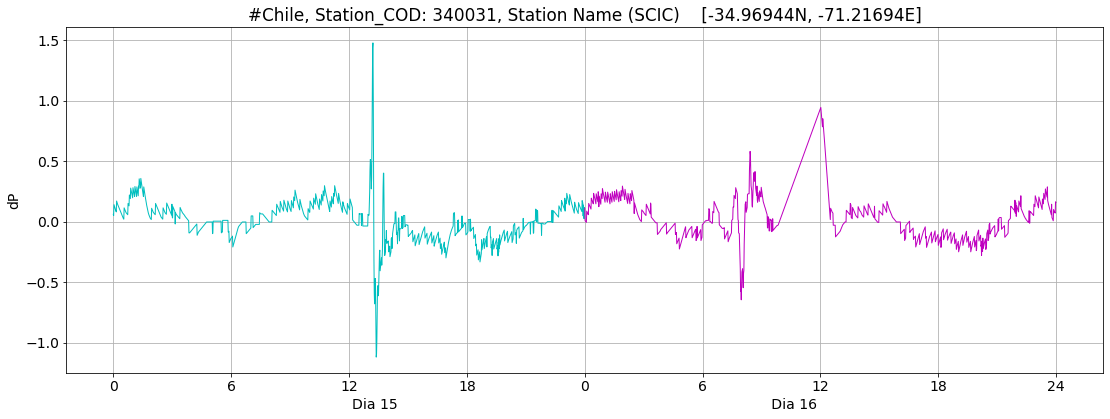

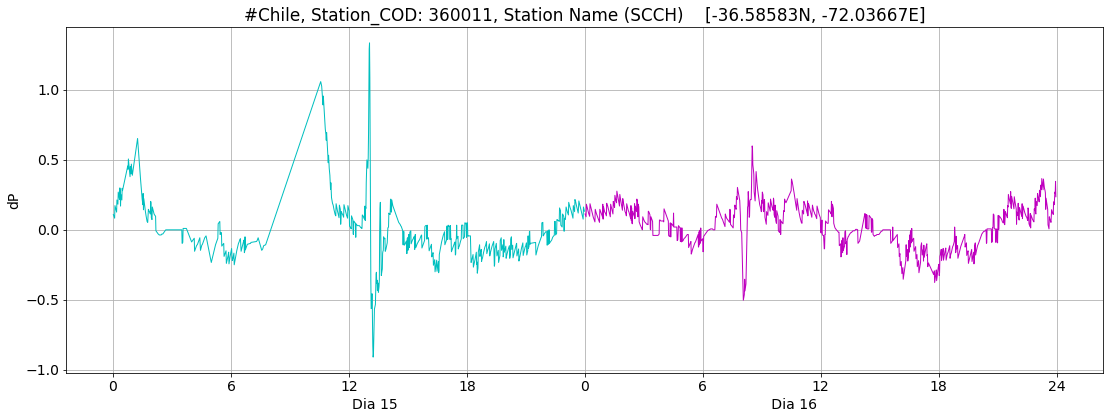

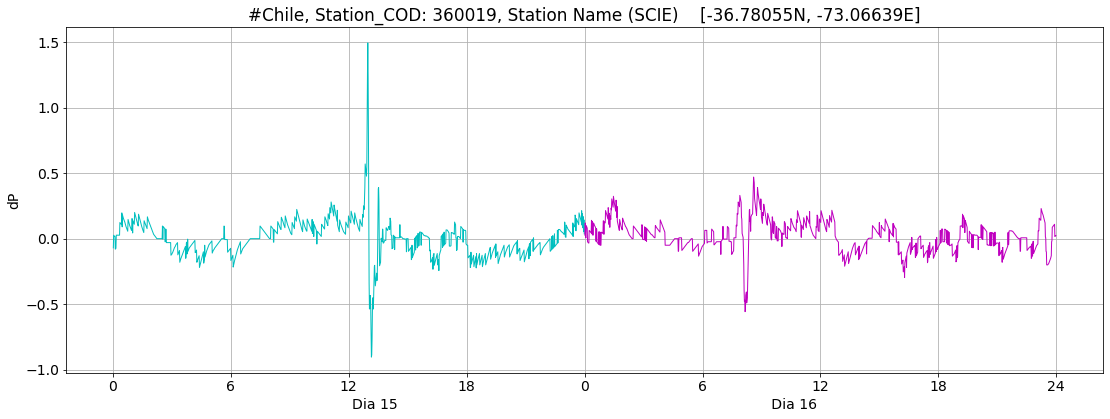

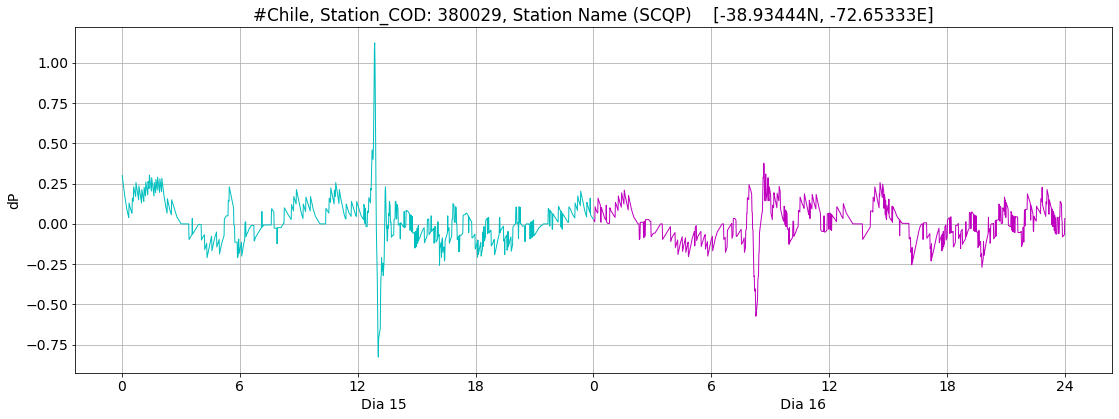

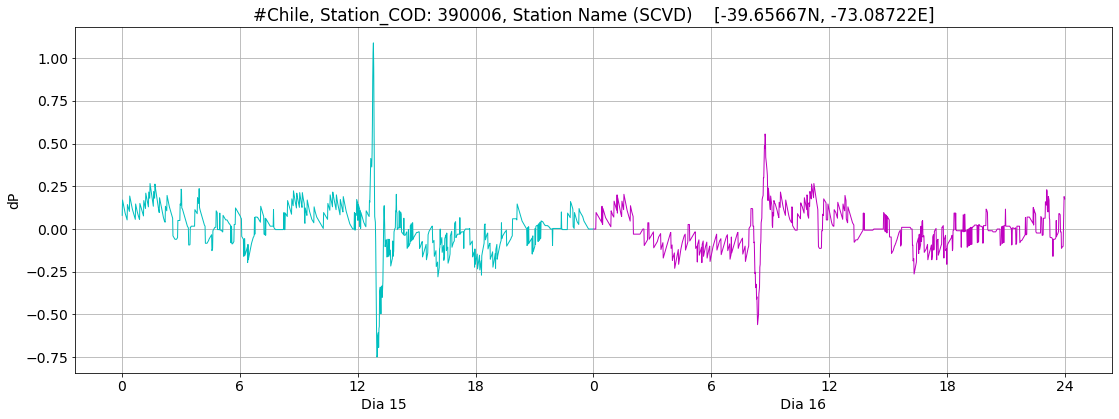

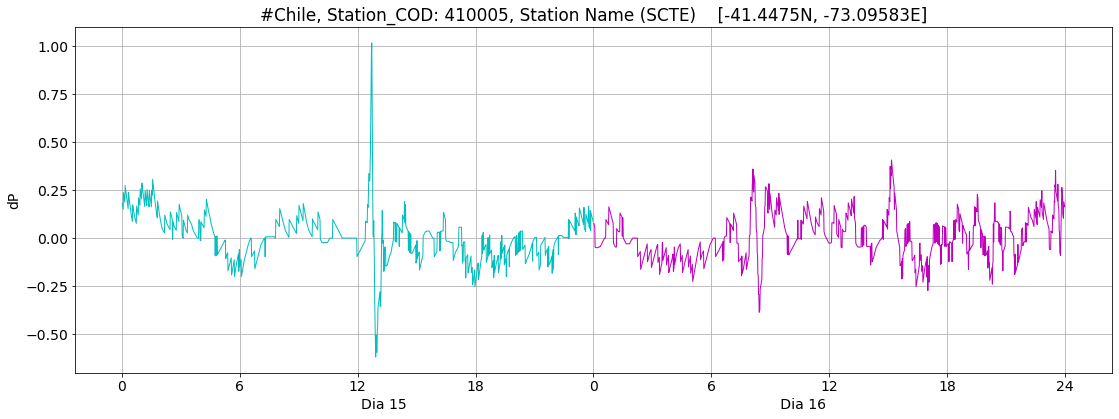

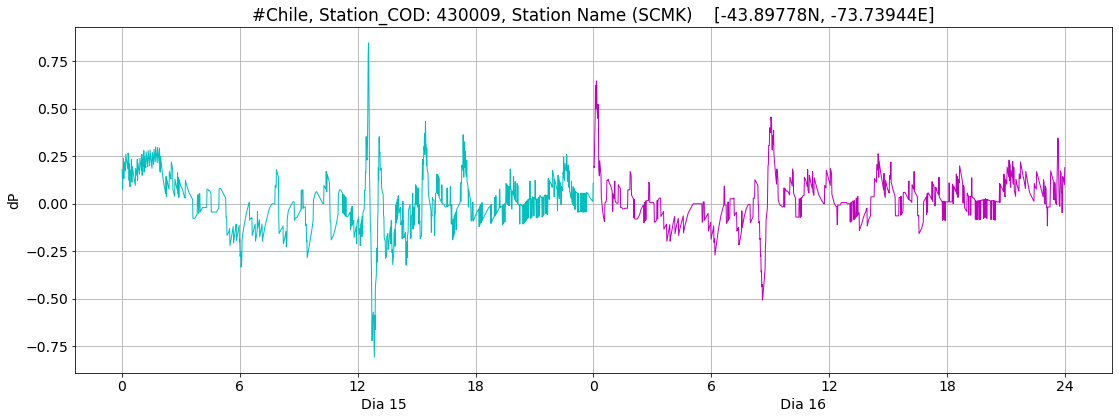

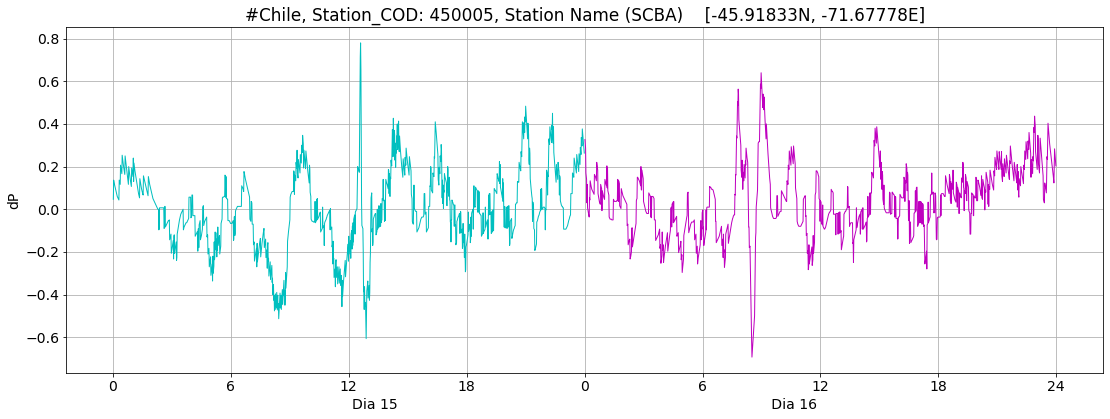

In [5]:
for fn in range(len(file)):
    df_file=pd.read_csv(file[fn],delimiter=";")
    cod=int(file[fn][13:19])

    ###--Transformando as horas em decimal e armazenando tudo na coluna time
    df_file['dia']=df_file['momento'].str.slice(8, 10).astype(int)
    df_file['hora']=df_file['momento'].str.slice(11,13).astype(int)/24
    df_file['min']=df_file['momento'].str.slice(14,16).astype(int)/(60*24)
    df_file['seg']=df_file['momento'].str.slice(17,19).astype(int)/(60*60*24)
    df_file['time']=df_file['dia']+df_file['hora']+df_file['min']+df_file['seg']
    ###--Deletando as colunas que nao temos interesse 
    df_file=df_file[['time','p0']]
    ###--Deletando a ultima linha (1 de fevereiro)
    df_file = df_file.iloc[:-1 , :]

    ###--Tomando a dP de apenas uma estação.
    df_dP=pd.DataFrame() ###---------------------------------------------------------------Isso pode dar problema
    df_dP['time']=df_file['time']
    df_dP['p0']=df_file['p0']-df_file['p0'].rolling(30).mean()

    ###--Extraindo apenas as datas de interesse:
    ind15=(df_dP['time']>15) & (df_dP['time']<16)
    ind16=(df_dP['time']>16) & (df_dP['time']<17) 

    ###----------------------------------------------###
    ###----------------------------------------------###
    fig=plt.figure()
    plt.rcParams['figure.figsize']=[16,6]
    plt.rcParams.update({'font.size':14})

    ax = fig.add_axes([0.1,0.1,0.9,0.8])

    x=df_dP['time'][ind15]
    y=df_dP['p0'][ind15]
    ax.plot(x,y,'c',lw=1)
    
    x=df_dP['time'][ind16]
    y=df_dP['p0'][ind16]
    ax.plot(x,y,'m',lw=1)

    sta_cod=cod
    sta_name=df_sta['Codigo OACI'][cod]
    sta_lat=df_sta['Latitud'][cod]
    sta_lon=df_sta['Longitud'][cod]

    ax.set_xlabel('Dia 15                                                                                   Dia 16')
    ax.set_ylabel('dP')
    plt.xticks([15,15.25,15.50,15.75,16,16.25,16.50,16.75,17],[0,6,12,18,0,6,12,18,24])
    ax.set_title('#Chile, Station_COD: {}, Station Name ({})    [{}N, {}E]'.format(sta_cod,sta_name,sta_lat,sta_lon))
    ax.grid(True)
    # ax.legend()
    fig.savefig('figures/{}_{}.pdf'.format(sta_cod,sta_name))

### ------------------------------------------

In [6]:
# retirando valores de minimos e maximos
df_c15=pd.DataFrame(columns=['Codigo Nacional', 'time','dP_max'])
df_c16=pd.DataFrame(columns=['Codigo Nacional', 'time','dP_min'])

for fn in range(len(file)):
    df_file=pd.read_csv(file[fn],delimiter=";")
    cod=int(file[fn][13:19])

    ###--Transformando as horas em decimal e armazenando tudo na coluna time
    df_file['dia']=df_file['momento'].str.slice(8, 10).astype(int)
    df_file['hora']=df_file['momento'].str.slice(11,13).astype(int)/24
    df_file['min']=df_file['momento'].str.slice(14,16).astype(int)/(60*24)
    df_file['seg']=df_file['momento'].str.slice(17,19).astype(int)/(60*60*24)
    df_file['time']=df_file['dia']+df_file['hora']+df_file['min']+df_file['seg']
    ###--Deletando as colunas que nao temos interesse 
    df_file=df_file[['time','p0']]
    ###--Deletando a ultima linha (1 de fevereiro)
    df_file = df_file.iloc[:-1 , :]

    ###--Tomando a dP de apenas uma estação.
    df_dP=pd.DataFrame() ###---------------------------------------------------------------Isso pode dar problema
    df_dP['time']=df_file['time']
    df_dP['dP']=df_file['p0']-df_file['p0'].rolling(30).mean()

    ###--Extraindo apenas as datas de interesse:
    ind15=(df_dP['time']>15) & (df_dP['time']<16)
    ind16=(df_dP['time']>16) & (df_dP['time']<17) 

    imax=df_dP[ind15]['dP'].idxmax()
    df_c15=df_c15.append(pd.DataFrame([[cod,df_dP['time'][imax],df_dP['dP'][imax]]], columns=['Codigo Nacional', 'time','dP_max']))

    imin=df_dP[ind16]['dP'].idxmin()
    df_c16=df_c16.append(pd.DataFrame([[cod,df_dP['time'][imin],df_dP['dP'][imin]]], columns=['Codigo Nacional', 'time','dP_min']))

In [5]:
# df_sta=pd.read_csv('rel_station.csv',delimiter=";")
# df_sta=df_sta[['Codigo Nacional','Codigo OACI','Latitud','Longitud']]
# df_sta

15.584722222222222

In [67]:
cod

200006

In [8]:
# df_c15

In [9]:
# df_c16

In [7]:
df_sta15=pd.merge(df_sta, df_c15,how='inner',on='Codigo Nacional')
df_sta15=df_sta15.sort_values(by=['time'])

df_sta15['time']=df_sta15['time']-15
df_sta15['time']=df_sta15['time']*24
# df_sta15

In [8]:
df_sta16=pd.merge(df_sta, df_c16,how='inner',on='Codigo Nacional')

df_sta16['time']=df_sta16['time']-16
df_sta16['time']=df_sta16['time']*24
# df_sta16

In [12]:
y

Latitud  Longitud
16 -43.89778 -73.73944
17 -45.91833 -71.67778
15 -41.44750 -73.09583
14 -39.65667 -73.08722
13 -38.93444 -72.65333
12 -36.78055 -73.06639
11 -36.58583 -72.03667
10 -34.96944 -71.21694
8  -33.65611 -71.61333
5  -33.06528 -71.55639
4  -32.94944 -71.47611
6  -33.45528 -70.54861
7  -33.37833 -70.78778
9  -33.11389 -70.68583
3  -29.91444 -71.20667
2  -22.49806 -68.89250
1  -20.54917 -70.18111
0  -18.35555 -70.34028

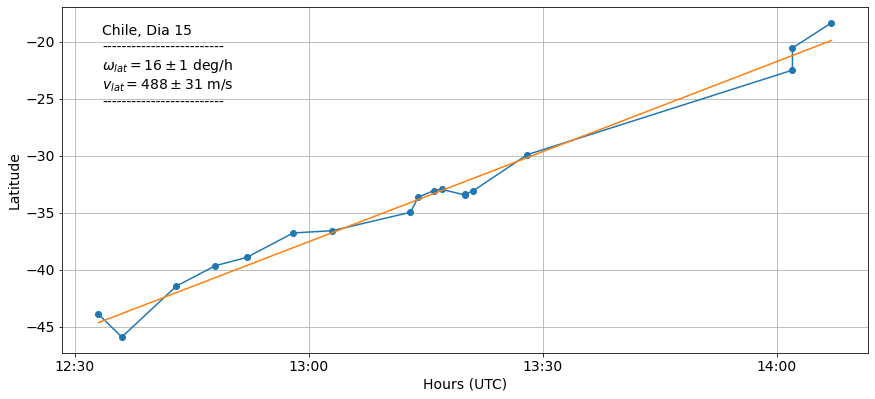

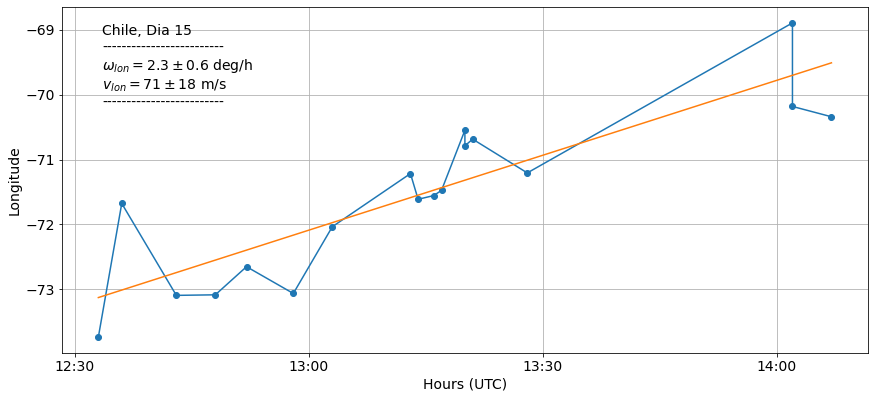

In [13]:
X=df_sta15[['time']]
y= df_sta15[['Latitud','Longitud']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))


####-------------------------------------------------FIGURE1 (Lat) day 15
fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})

error=metrics.mean_squared_error(y['Latitud'],Y_fit[0])
error=np.sqrt(error)

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(X,y['Latitud'],marker='o')
# m, b = np.polyfit(x,y, 1)

Rt=6371000
ang_coef=lm.coef_[0]
rad_s=ang_coef*np.pi/(180*3600)
vel_tg=rad_s*Rt
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Chile, Dia 15',
    r'-------------------------',
    r'$\omega_{lat}=%.0f \pm %.0f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lat}=%.0f \pm %.0f$ m/s' % (vel_tg,vel_error),
    r'-------------------------',))

legenda="caption"
ax.plot(X,Y_fit[0], label=legenda)

#ax.set_title(lab)
ax.grid(True)
ax.set_xticks([12.5,13,13.5,14],['12:30','13:00','13:30','14:00',])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Latitude')
#ax.set_title('Dia 15')


ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('txlat15.pdf')

####-------------------------------------------------FIGURE1 (Lon) day 15
fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})


error=metrics.mean_squared_error(y['Longitud'],Y_fit[1])
error=np.sqrt(error)


# x=df_sta15['time']
# y=df_sta15['Longitud']

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(X,y['Longitud'],marker='o')
# m, b = np.polyfit(x,y, 1)

Rt=6371000
ang_coef=lm.coef_[1]
rad_s=ang_coef*np.pi/(180*3600)
vel_tg=rad_s*Rt
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Chile, Dia 15',
    r'-------------------------',
    r'$\omega_{lon}=%.1f \pm %.1f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lon}=%.0f \pm %.0f$ m/s' % (vel_tg,vel_error),
    r'-------------------------',))



legenda="caption"
ax.plot(X,Y_fit[1], label=legenda)

#ax.set_title(lab)
ax.grid(True)
ax.set_xticks([12.5,13,13.5,14],['12:30','13:00','13:30','14:00',])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Longitude')
#ax.set_title('Dia 15')


ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('txlat15.pdf')

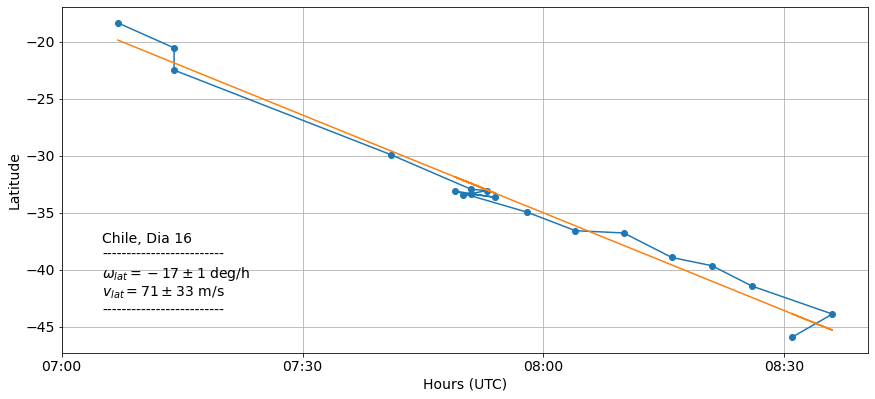

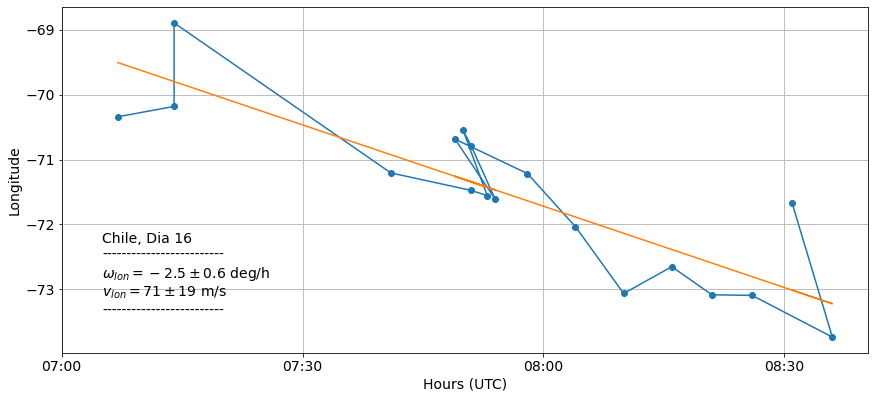

In [33]:
X=df_sta16[['time']]
y= df_sta16[['Latitud','Longitud']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))


####-------------------------------------------------FIGURE1 (Lat) day 15
fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})

error=metrics.mean_squared_error(y['Latitud'],Y_fit[0])
error=np.sqrt(error)

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(X,y['Latitud'],marker='o')
# m, b = np.polyfit(x,y, 1)

Rt=6371000
and_coef=lm.coef_[0]
rad_s=ang_coef*np.pi/(180*3600)
vel_tg=rad_s*Rt
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Chile, Dia 16',
    r'-------------------------',
    r'$\omega_{lat}=%.0f \pm %.0f$ deg/h' % (and_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lat}=%.0f \pm %.0f$ m/s' % (vel_tg,vel_error),
    r'-------------------------',))

# x=df_sta15['time']
# y=df_sta15['Latitud']

# ax = fig.add_axes([0.1,0.1,0.8,0.8])
# ax.plot(x,y,marker='o')
# m, b = np.polyfit(x,y, 1)

# Rt=6371000
# rad_s=m*np.pi/(180*3600)
# vel_tg=rad_s*Rt
# vel_lat=vel_tg

# textstr = '\n'.join((
#     r'Chile, Dia 15',
#     r'-------------------------',
#     r'$\omega_{lat}=%.2f$ deg/h' % (m, ),
#     #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
#     r'$v_{lat}=%.2f$ m/s' % (vel_tg, ),
#     r'-------------------------',))



legenda="caption"
ax.plot(X,Y_fit[0], label=legenda)

#ax.set_title(lab)
ax.grid(True)
ax.set_xticks([7,7.5,8,8.5],['07:00','07:30','08:00','08:30',])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Latitude')
#ax.set_title('Dia 15')


ax.text(0.05, 0.35, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('txlat15.pdf')

####-------------------------------------------------FIGURE1 (Lon) day 15
fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})


error=metrics.mean_squared_error(y['Longitud'],Y_fit[1])
error=np.sqrt(error)


# x=df_sta15['time']
# y=df_sta15['Longitud']

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(X,y['Longitud'],marker='o')
# m, b = np.polyfit(x,y, 1)

Rt=6371000 #em metros
and_coef=lm.coef_[1]
rad_s=ang_coef*np.pi/(180*3600)
vel_tg=rad_s*Rt
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Chile, Dia 16',
    r'-------------------------',
    r'$\omega_{lon}=%.1f \pm %.1f$ deg/h' % (and_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lon}=%.0f \pm %.0f$ m/s' % (vel_tg,vel_error),
    r'-------------------------',))



legenda="caption"
ax.plot(X,Y_fit[1], label=legenda)

#ax.set_title(lab)
ax.grid(True)
ax.set_xticks([7,7.5,8,8.5],['07:00','07:30','08:00','08:30',])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Longitude')
#ax.set_title('Dia 15')


ax.text(0.05, 0.35, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('txlat15.pdf')

In [36]:
df_sta16

Codigo Nacional Codigo OACI   Latitud  Longitud      time    dP_min
0            180005        SCAR -18.35555 -70.34028  7.116667 -0.916667
1            200006        SCDA -20.54917 -70.18111  7.233333 -0.753333
2            220002        SCCF -22.49806 -68.89250  7.233333 -0.673333
3            290004        SCSE -29.91444 -71.20667  7.683333 -0.470000
4            320041        SCVM -32.94944 -71.47611  7.850000 -0.733333
5            330007        SCRD -33.06528 -71.55639  7.883333 -0.673333
6            330019        SCTB -33.45528 -70.54861  7.833333 -0.583333
7            330021        SCEL -33.37833 -70.78778  7.850000 -0.740000
8            330030        SCSN -33.65611 -71.61333  7.900000 -0.726667
9            330163        SCPD -33.11389 -70.68583  7.816667 -0.733333
10           340031        SCIC -34.96944 -71.21694  7.966944 -0.643333
11           360011        SCCH -36.58583 -72.03667  8.066667 -0.503333
12           360019        SCIE -36.78055 -73.06639  8.166667 -0.556667
13           380029        SCQP -38.93444 -72.65333  8.266667 -0.573333
14           390006        SCVD -39.65667 -73.08722  8.350000 -0.560000
15           410005        SCTE -41.44750 -73.09583  8.433333 -0.386667
16           430009        SCMK -43.89778 -73.73944  8.600000 -0.506667
17           450005        SCBA -45.91833 -71.67778  8.516667 -0.693333

### Tonga information DOI: https://doi.org/10.1002/essoar.10510674.1

In [76]:
tt=4+28/60
tlat=-20.54
tlon=-175.38
tt

4.466666666666667

In [81]:
Rt=6371000 #em metros

df_sta16['ds']=((df_sta16['Latitud']-tlat)**2+(df_sta16['Longitud']-tlon)**2)**(1/2)
df_sta16['ds_m']=df_sta16['ds']*Rt*np.pi/180
df_sta16['dt']=df_sta16['time']-tt

In [82]:
df_sta16

Codigo Nacional Codigo OACI   Latitud  Longitud      time    dP_min  \
0            180005        SCAR -18.35555 -70.34028  7.116667 -0.916667   
1            200006        SCDA -20.54917 -70.18111  7.233333 -0.753333   
2            220002        SCCF -22.49806 -68.89250  7.233333 -0.673333   
3            290004        SCSE -29.91444 -71.20667  7.683333 -0.470000   
4            320041        SCVM -32.94944 -71.47611  7.850000 -0.733333   
5            330007        SCRD -33.06528 -71.55639  7.883333 -0.673333   
6            330019        SCTB -33.45528 -70.54861  7.833333 -0.583333   
7            330021        SCEL -33.37833 -70.78778  7.850000 -0.740000   
8            330030        SCSN -33.65611 -71.61333  7.900000 -0.726667   
9            330163        SCPD -33.11389 -70.68583  7.816667 -0.733333   
10           340031        SCIC -34.96944 -71.21694  7.966944 -0.643333   
11           360011        SCCH -36.58583 -72.03667  8.066667 -0.503333   
12           360019        SCIE -36.78055 -73.06639  8.166667 -0.556667   
13           380029        SCQP -38.93444 -72.65333  8.266667 -0.573333   
14           390006        SCVD -39.65667 -73.08722  8.350000 -0.560000   
15           410005        SCTE -41.44750 -73.09583  8.433333 -0.386667   
16           430009        SCMK -43.89778 -73.73944  8.600000 -0.506667   
17           450005        SCBA -45.91833 -71.67778  8.516667 -0.693333   

     distancia          ds        dt          ds_m  
0   105.062432  105.062432  2.650000  1.168241e+07  
1   105.198890  105.198890  2.766667  1.169758e+07  
2   106.505501  106.505501  2.766667  1.184287e+07  
3   104.594277  104.594277  3.216667  1.163035e+07  
4   104.642308  104.642308  3.383333  1.163569e+07  
5   104.576406  104.576406  3.416667  1.162837e+07  
6   105.623978  105.623978  3.366667  1.174485e+07  
7   105.377204  105.377204  3.383333  1.171741e+07  
8   104.592324  104.592324  3.433333  1.163014e+07  
9   105.446536  105.446536  3.350000  1.172512e+07  
10  105.157747  105.157747  3.500278  1.169301e+07  
11  104.581607  104.581607  3.600000  1.162894e+07  
12  103.594547  103.594547  3.700000  1.151919e+07  
13  104.360549  104.360549  3.800000  1.160436e+07  
14  104.063730  104.063730  3.883333  1.157136e+07  
15  104.399114  104.399114  3.966667  1.160865e+07  
16  104.289929  104.289929  4.133333  1.159651e+07  
17  106.762400  106.762400  4.050000  1.187144e+07

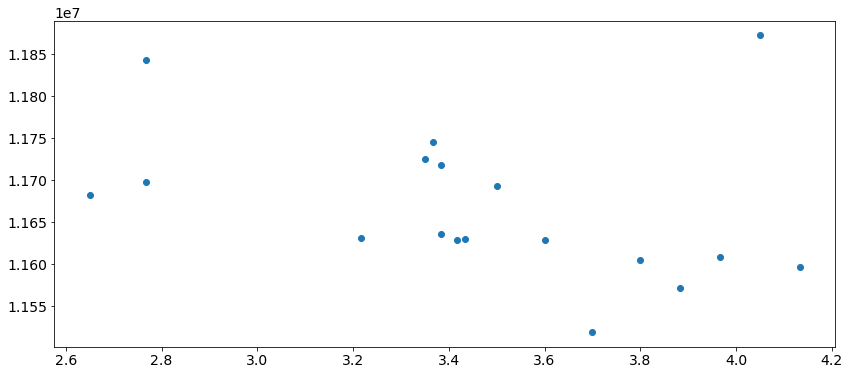

In [84]:
plt.plot(df_sta16['dt'],df_sta16['ds_m'],'o')